In [1]:
import os
os.getcwd()

'C:\\Users\\supervisor\\tf.Keras_book\\ch01'

In [1]:
# 載入 MNIST 資料集
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# 畫出手寫數字圖片,載入matplotlib
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4)  #←設定圖形的寬和高 (英吋)

for i in range(5):
    ax = plt.subplot(1, 5, 1+i)  #←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(train_images[i], cmap= 'gray')   #←顯示灰階圖片(黑底白字)
    ax.set_title('label = '+str(train_labels[i]), fontsize=18)  #←設定標題
plt.show()  #將圖形顯示出來

<Figure size 1500x400 with 5 Axes>

In [3]:
# 預處理訓練資料
x_train = train_images.reshape((60000, 28 * 28)) #←將 (60000,28,28) 轉換成 (60000,784)
x_train = x_train.astype('float32') / 255    #←再將 0~255 的像素值轉換成 0~1 的浮點數

x_test = test_images.reshape((10000, 28 * 28))  #}←將 10000 筆測試樣本做同樣的轉換
x_test = x_test.astype('float32') / 255         #}

# 預處理標籤資料
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)  #←將標籤做 One-hot 編碼
y_test  = to_categorical(test_labels)  #←將測試做 One-hot 編碼
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
#程 建立多元分類模型
from tensorflow.keras.models import Sequential  #← 匯入 Keras 的序列式模型類別
from tensorflow.keras.layers import Dense       #← 匯入 Keras 的密集層類別

model = Sequential()                 #← 建立序列模型物件
model.add(Dense(512, activation='relu', input_dim= 784)) #← 加入第一層
model.add(Dense(10, activation='softmax'))               #← 加入第二層
model.compile(optimizer='rmsprop',             #← 指定優化器
              loss='categorical_crossentropy', #← 指定損失函數
              metrics=['acc'])                 #← 指定評量準則


In [5]:
#程 訓練模型
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2560 - acc: 0.9257
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1047 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0691 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0499 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0376 - acc: 0.9885


In [6]:
#程 評估模型成效
test_loss, test_acc = model.evaluate(x_test, y_test)   #←使用測試樣本及標籤來評估普適能力
print('對測試資料集的準確率：', test_acc)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

對測試資料集的準確率： 0.9813


In [7]:
#程 畫出測試圖片並標示預測結果與標準答案

predict = model.predict_classes(x_test)  #←用測試樣本進行預測


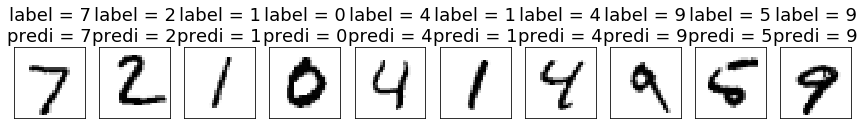

In [10]:
plt.gcf().set_size_inches(15, 4)  #←設定圖形的尺吋
for i in range(10):
    ax = plt.subplot(1, 10, i+1)   #←設定 1x10 的子圖表, 目前要畫第 1+i 個
    ax.imshow(test_images[i], cmap='binary')   #←顯示灰階圖片
    ax.set_title('label = '+str(test_labels[i]) +
                 '\npredi = '+str(predict[i]), fontsize=18) #←設定標題
    ax.set_xticks([]); ax.set_yticks([])       #←X, Y 軸不顯示刻度
plt.show()  #←將圖形顯示出來

In [11]:
#程 將模型存檔
model.save('MnistModel.h5')   #← 將模型以指定的檔名存檔
